# Sampling Novel Body Poses from VPoser
![alt text](https://github.com/nghorbani/human_body_prior/raw/845ad715b82bbd1a4e4772b23a0b7e4cd92203c6/github_data/latent_interpolation_1.gif "Interpolation of novel poses on the smoother VPoser latent space.")

You can use VPoser to produce novel random poses. 
This generative model can be potentially used as a synthetic data generator to train other models.

For this you would need to first obtain a trained VPoser from https://smpl-x.is.tue.mpg.de/downloads .
Put the obtained model in a folder, here we assume 

'GITHUB_CLONE_ROOT/human_body_prior/dowloads/vposer_v1_0',

and afterwards you can use the following code snippet to sample new poses: 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline

expr_dir = '../body_models/vposer_v1_0' #'TRAINED_MODEL_DIRECTORY'  in this directory the trained model along with the model code exist
bm_path =  '../body_models/smplx/SMPLX_FEMALE.npz' #'PATH_TO_SMPLX_model.npz'  obtain from https://smpl-x.is.tue.mpg.de/downloads

In [2]:
from human_body_prior.tools.model_loader import load_vposer

vposer_pt, ps = load_vposer(expr_dir, vp_model='snapshot')

Found Trained Model: ../body_models/vposer_v1_0/snapshots/TR00_E096.pt


To visualize the generated poses you can use the *sample_body_pose* script. 
The visualization code requires you to give the path to a variation of SMPL model, here we use SMPLx, obtainable from https://smpl-x.is.tue.mpg.de/downloads

Put the obtained model in a folder, here we assume:

'GITHUB_CLONE_ROOT/human_body_prior/dowloads/models'

and then the following shows an example to render poses:

In [3]:
from human_body_prior.body_model.body_model import BodyModel
from human_body_prior.tools.visualization_tools import imagearray2file
from notebook_tools import show_image
from sample_body_pose import dump_vposer_samples

import numpy as np

bm = BodyModel(bm_path)

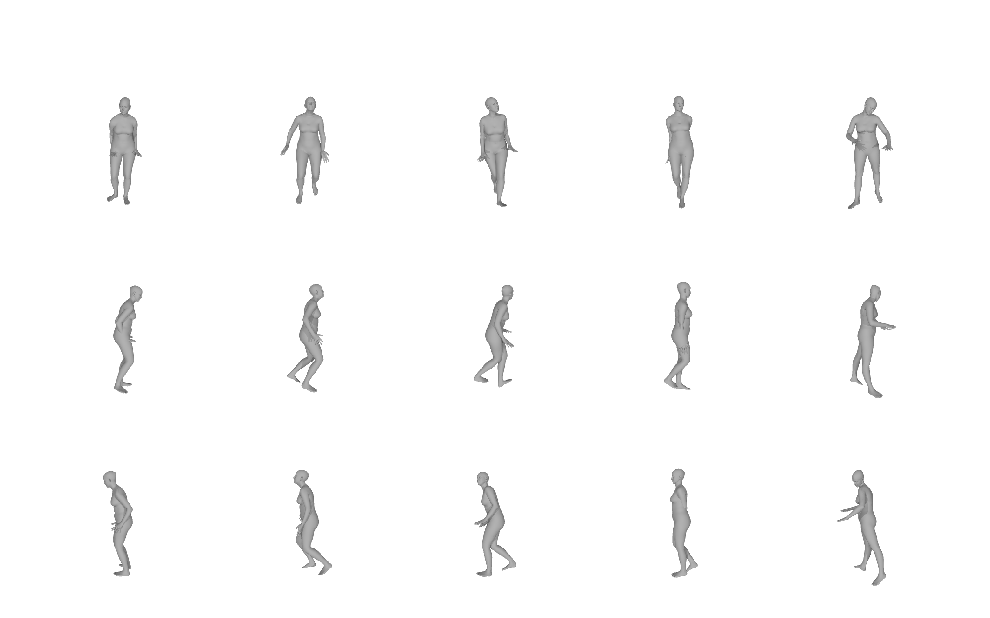

In [4]:
num_poses = 5 # number of body poses in each batch

sampled_pose_body = vposer_pt.sample_poses(num_poses=num_poses) # will a generate Nx1x21x3 tensor of body poses  
# expr_dir: directory for the trained model along with the model code. obtain from https://smpl-x.is.tue.mpg.de/downloads
images = dump_vposer_samples(bm, sampled_pose_body)
img = imagearray2file(images)
show_image(np.array(img)[0])

The each column of the first row of the above image are the novel poses, and the following rows are varied rotations for demonstration purpose
so that you can see the generated body from different angles.

# VPoser Latent Space Interpolation
You can go one stap further and investigate the smoothness of the latent space of VPoser. 
To do this you sample two poses poZ<sub>1</sub> and poZ<sub>2</sub> and then use &alpha; &in; [0.,1.] to change the influence 
of each on the interpolated poZ<sub>inp</sub>, e.g.
 
poZ<sub>inp</sub> = &alpha; * poZ<sub>1</sub> + (1-&alpha;)* poZ<sub>2</sub>.

The header animations show the video of body poses that are result of decoding corresponding varying poZ<sub>inp</sub> values.
